# Density Based Spatial Clustering of Applications with Noise

In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from shared_modules.nearest_neighbor_graph_utils import elbowNN

In [2]:
# Check the Matplotlib Version 
print ("Matplotlib Version", matplotlib.__version__)

Matplotlib Version 3.0.3


## Using DBSCAN for Tasks Like Class Identification on a Spatial Context

Usually 2 parameters for DBSCAN to Optimize 
* <font color='red'>Epsilon</font> 
* <font color='red'>Minimum Points</font>

<font color='red'>Epsilon $(\epsilon)$ </font> determines how much close the points should be to be considered a part of a cluster and <font color='red'>Minimum Points _(MinPts)_ </font> determines how many number of samples (points) need to be considered around a point within the radius $\epsilon$ to be considered as a _Core Point_. _MinPts_ include the point in consideration itself.   


We start with loading the Canada Weather Data-Set. We will __cluster weather stations that show similar weather conditions__. Selection of features and applications on clustering will be shown. Since the data domain is not so well understood, it is always best to play around with $\epsilon$ and _MinPts_ parameter in Scikit learn.  

/Users/geoffreywillis/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/geoffreywillis/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


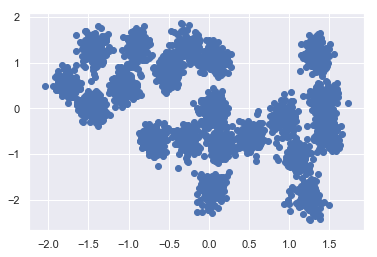

In [5]:
import pandas as pd

weather_df = pd.read_csv('a1.txt', delim_whitespace = True)

# Scale data
mat = StandardScaler().fit_transform(weather_df);

# display original data
plt.scatter(mat[:,0],mat[:,1])

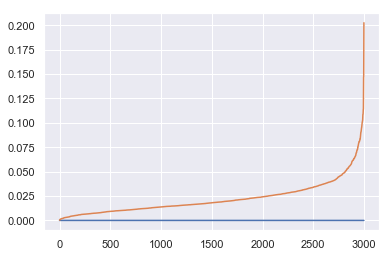

In [6]:
# Look for maximum eps
elbowNN(mat)

Estimated number of clusters: 27
Estimated number of noise points: 713


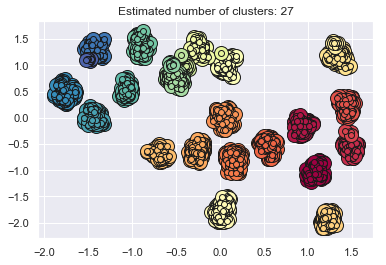

In [7]:
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

eps = .065
noise_points = mat.size
keep_going = True
while keep_going:
# This is the algorithm.  You can play with ips and min_samples to see when the noise points drop
    db = DBSCAN(eps=eps, min_samples=10, metric='euclidean')

# Create Clusters
    y_db = db.fit_predict(mat)

# Cluster for each point.  It will be the number of the cluster
    labels = db.labels_

# The set command removes duplicates
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# The noise cluster will be labeled -1.  This counts it.
    n_noise_ = list(labels).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

# db.core_sample_indices_ are the # of the cluster that an item belongs to
    #print("labels")
    #print(db.core_sample_indices_)
    core_samples_mask[db.core_sample_indices_] = True
    eps = eps + .05
    #if n_noise_ >= noise_points:
    keep_going = False

    
# cluster label for each point in the dataset

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
        for each in np.linspace(0,1, len(unique_labels))]

# plot the cluster centers
for k, col in zip(unique_labels, colors):
        if k == -1:
                col = [0, 0, 0, 1]
    
        class_member_mask = (labels == k)

        xy = mat[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=14)
    
        xy = mat[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=6)
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
    


In [8]:
set(labels)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26}

#### Plot the Clusters in the Map. 

## Repeat The Process One More Time Including Precipitation as Feature  